### All example

In [1]:
# if using Hooklog3
#%run Hooklog3.ipynb
#Hooklog = Hooklog3

# elis using NestedHooklog3
#%run NestedHooklog3.ipynb
#Hooklog = NestedHooklog3

# elis using FeatureHooklog3
%run FeatureHooklog3.ipynb
Hooklog = FeatureHooklog3

# elis using NestedFeatureHooklog3
#%run NestedFeatureHooklog3.ipynb
#Hooklog = NestedFeatureHooklog3

In [2]:
import os
import pickle

In [3]:
# input 
in_directory = "hooklogs_by_family_7137HK/virtob/main/" # make sure the last character is '/'
in_tag = "virtob_main"    
in_parseFirstPar = True
in_window = 1

out_tag = in_tag

In [4]:
# Hooklog
hl_list = next(os.walk(in_directory))[2] # get all filenames in the in_directory
hl_list = [os.path.join(in_directory, f) for f in hl_list] # filepathname list

hl_list = list(filter(lambda f: f.endswith(".hooklog"), hl_list)) # in case some non-hooklog file in the folder

for file in hl_list:
    hl3 = Hooklog(file, in_parseFirstPar)

In [5]:
#Test
print(hl3)
#for t, a in hl3:
#    print(t, a)

class FeatureHooklog3, hooklogs_by_family_7137HK/virtob/main/ffbf0188de513b179cee254b68e648817e0ecbdd472b43f846104be63aff0cfc_3360.trace.hooklog, len = 88, digit name = ffbf01-3360


In [6]:
out_hl_list_pkf = 'pickle/hl_list_'+ in_tag + '.pickle'
if not os.path.isdir('pickle'): os.makedirs('pickle')
with open(out_hl_list_pkf, 'wb') as o:
    pickle.dump(hl_list, o)

In [7]:
%run distanceMatrixJaccard.ipynb

In [8]:
# distanceMatrixJaccard

matrix = distanceMatrixJaccard(in_tag, hl_list, in_parseFirstPar, in_window)

In [9]:
out_matrix_pkf = 'pickle/matrix_'+ out_tag + '.pickle'
with open(out_matrix_pkf, 'wb') as o:
    pickle.dump(matrix, o)

In [10]:
%run UPGMA.ipynb

In [14]:
in_orientation = "right"
in_upgma_threshold = 0.8
in_figsize_x = 6
in_figsize_y = 6

out_pdf = 'output/upgma_' + out_tag + '.pdf'
out_Z_pkf = 'pickle/Z_' + out_tag + '.pickle'

In [15]:
Z = UPGMA(matrix)
label_list = [hl.split('/')[-1][:6] + '-' + hl.split('_')[-1].split('.')[0] for hl in hl_list]

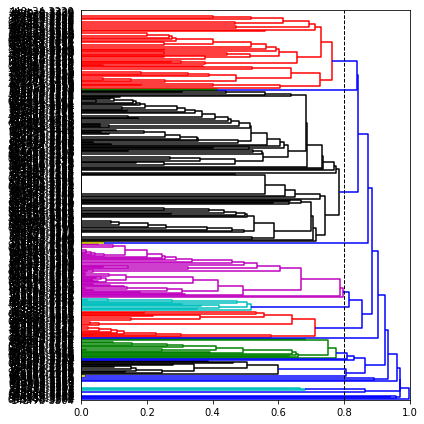

In [16]:
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt
%matplotlib inline

(orig_x, orig_y) = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (in_figsize_x, in_figsize_y) #---input

#MIKE: Hack the height of tree, make sure we can see them
#for z in Z:
#    if z[2] < 0.002: z[2] = 0.002
P = sch.dendrogram(Z, color_threshold = in_upgma_threshold, labels = label_list, orientation = in_orientation)

if in_orientation == "left" or in_orientation == "right": # vertical linen
    plt.axvline(x=in_upgma_threshold, linewidth=1, color='black', linestyle='--')
    plt.xlim(0.0, 1.0)
else: # horizontal line
    plt.axhline(y=in_upgma_threshold, linewidth=1, color='black', linestyle='--')
    plt.ylim(0.0, 1.0)
locs, labels = plt.yticks()
plt.setp(labels, fontsize = 10)
plt.tight_layout()

plt.rcParams['figure.figsize'] = (orig_x, orig_y)
#plt.show()
plt.savefig(out_pdf, dpi=300)

In [17]:
with open(out_Z_pkf, 'wb') as o:
    pickle.dump(Z, o)

In [18]:
%run groupingZ.ipynb

In [19]:
group_dict = groupingZ(Z, hl_list, in_upgma_threshold)

In [20]:
# Test

num_leaves = len(hl_list)
print('Total', len(group_dict), 'groups @ threshold =', in_upgma_threshold)

for g in group_dict:
    
    group_index = g
    height = group_dict[group_index][0]
    member_set = group_dict[group_index][1]
    
    print("==")
    print("G-%d, size %d, height %f" % (group_index, len(member_set), height))
    
    for m in member_set:
        pathfilename = hl_list[m]
        digitname = pathfilename.split('/')[-1][:6] + '-' + pathfilename.split('_')[-1].split('.')[0]
        print("  ", m, digitname)

Total 22 groups @ threshold = 0.8
==
G-32, size 1, height -1.000000
   32 142f7b-3304
==
G-133, size 1, height -1.000000
   133 54d65b-3364
==
G-141, size 1, height -1.000000
   141 568a7d-3372
==
G-144, size 1, height -1.000000
   144 588c73-3260
==
G-149, size 1, height -1.000000
   149 59d54c-3344
==
G-254, size 1, height -1.000000
   254 a2ea49-3232
==
G-332, size 1, height -1.000000
   332 de5248-3272
==
G-340, size 1, height -1.000000
   340 e1a9a4-3304
==
G-514, size 2, height 0.000000
   210 80d028-3184
   391 fd8eb9-3164
==
G-515, size 2, height 0.000000
   306 ce402e-3280
   63 26f99e-3236
==
G-525, size 4, height 0.000000
   176 6b1396-3292
   305 cd325f-3260
   324 d84189-3308
   156 5e2b1a-3208
==
G-529, size 3, height 0.012000
   241 96c1c0-3216
   212 81ba46-3336
   351 e5eba3-3152
==
G-559, size 2, height 0.068182
   48 1c6086-3280
   265 ae189e-3336
==
G-672, size 2, height 0.413793
   37 18bac6-3276
   279 ba5ba3-3212
==
G-706, size 14, height 0.517958
   256 a57678-3

In [21]:
out_group_dict_pkf = 'pickle/group_dict_' + out_tag + '.pickle'

with open(out_group_dict_pkf, 'wb') as o:
    pickle.dump(group_dict, o)

In [28]:
out_temp_path = 'hooklogs_by_family_7137HK/virtob/main/'

In [34]:
import shutil

with open(out_group_dict_pkf, 'rb')as handle:
    groupInfo = pickle.load(handle)

print(groupInfo.keys())
# print(groupInfo)

ctr=1
residual_list = list()
for k, v in groupInfo.items():
    memberSet = v[1]
    if(len(memberSet)>9):
        for m in memberSet:
            pathfilename = hl_list[m]
            hkFile = pathfilename.split('/')[-1]
            outDirName = out_temp_path+str(ctr)+"/"
            if not os.path.isdir(outDirName): os.makedirs(outDirName)
            shutil.copyfile(pathfilename, outDirName+hkFile)
        ctr+=1
    else:
        residual_list.append(v)

dict_keys([672, 514, 515, 133, 769, 332, 525, 141, 144, 529, 725, 771, 340, 149, 706, 32, 749, 559, 756, 765, 254, 767])


In [ ]:
# print(residual_list)

In [ ]:
# output 2
#new_dir = moveHooklogByGroupDict(group_dict, hl_list, in_tag + "_g")
#print(os.path.abspath(new_dir))